      Security      CIK      Founded  Founded_clean
0           3M    66740         1902         1902.0
1  A. O. Smith    91142         1916         1916.0
3       AbbVie  1551152  2013 (1888)         2013.0
4    Accenture  1467373         1989         1989.0
5   Adobe Inc.   796343         1982         1982.0


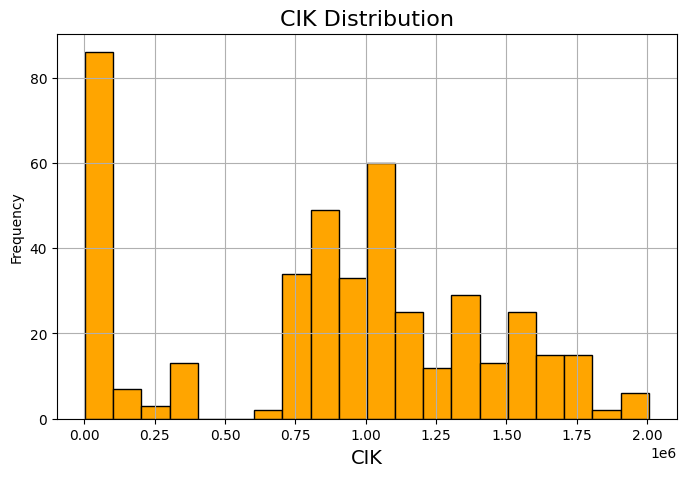

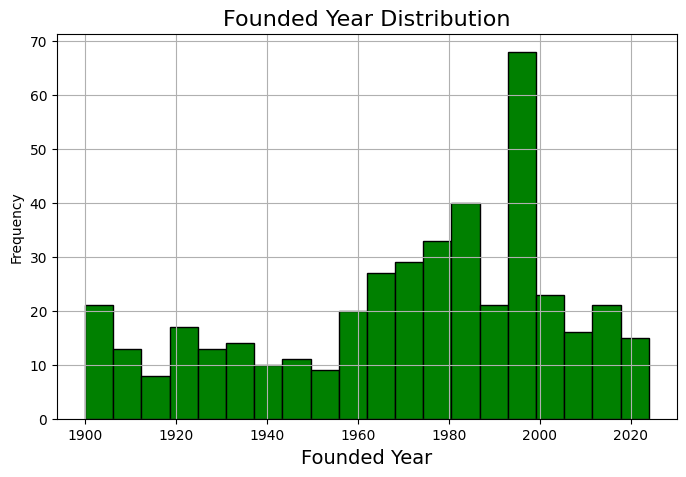

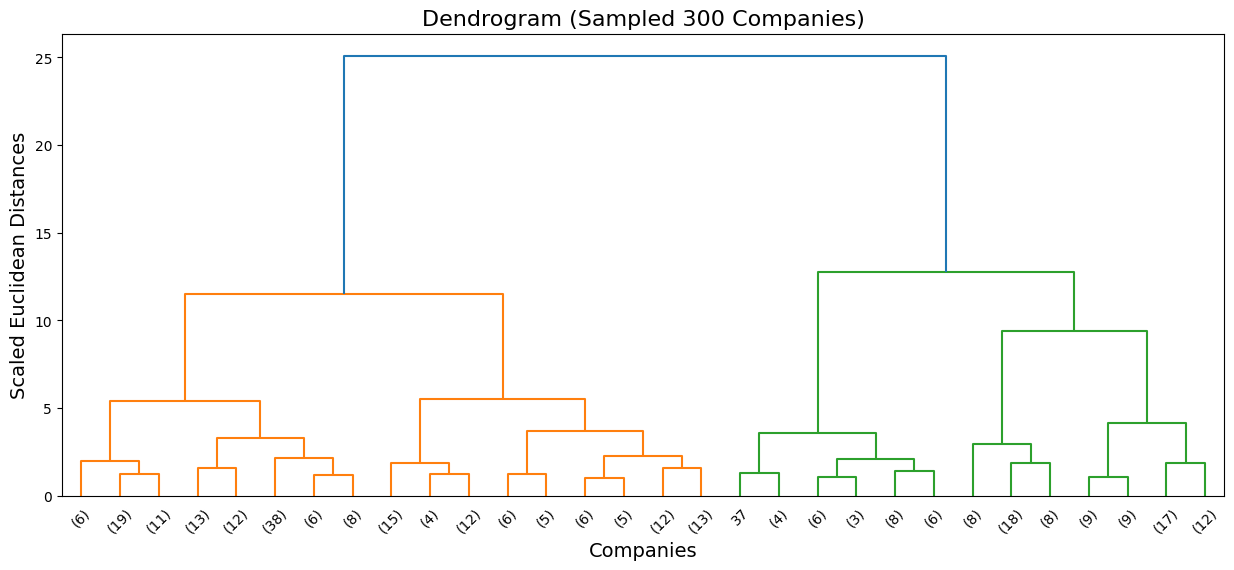

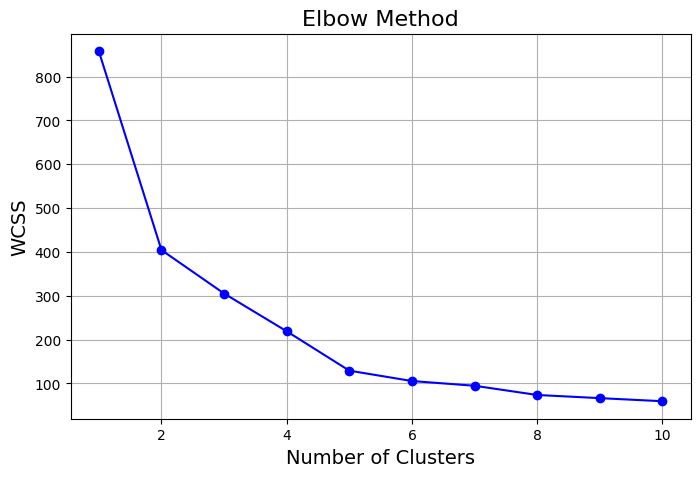

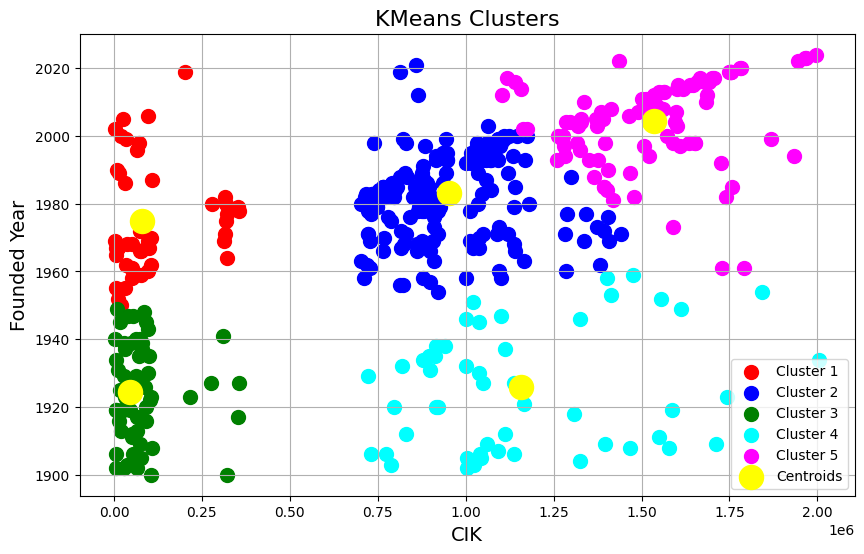

In [5]:
#22BDS0226
#PAYAL CHATTERJEE
#module 5 clustering

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re

%matplotlib inline

# 1. Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/constituents.csv"
df = pd.read_csv(url)

# 2. Clean 'Founded' column: extract first 4-digit year
def extract_year(val):
    if pd.isna(val):
        return np.nan
    match = re.search(r'\b(19|20)\d{2}\b', str(val))  # match years 1900-2099
    return int(match.group()) if match else np.nan

df['Founded_clean'] = df['Founded'].apply(extract_year)

# Convert CIK to numeric
df['CIK'] = pd.to_numeric(df['CIK'], errors='coerce')

# Drop rows with missing numeric values
df_clean = df.dropna(subset=['CIK', 'Founded_clean'])

# Preview cleaned data
print(df_clean[['Security', 'CIK', 'Founded', 'Founded_clean']].head())

# 3. Histograms for CIK and Founded_clean
plt.figure(figsize=(8,5))
plt.hist(df_clean['CIK'], bins=20, color='orange', edgecolor='k')
plt.title("CIK Distribution", fontsize=16)
plt.xlabel("CIK", fontsize=14)
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.hist(df_clean['Founded_clean'], bins=20, color='green', edgecolor='k')
plt.title("Founded Year Distribution", fontsize=16)
plt.xlabel("Founded Year", fontsize=14)
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 4. Prepare data for clustering
X_full = df_clean[['CIK', 'Founded_clean']].values

# Scale features to reduce large numeric differences
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# 5. Hierarchical clustering dendrogram (sampled)
df_sample = df_clean.sample(n=300, random_state=42)  # sample to avoid huge figure
X_sample = df_sample[['CIK', 'Founded_clean']].values
X_sample_scaled = scaler.fit_transform(X_sample)

plt.figure(figsize=(15,6))
linkage_matrix = sch.linkage(X_sample_scaled, method='ward')
plt.title('Dendrogram (Sampled 300 Companies)', fontsize=16)
plt.xlabel('Companies', fontsize=14)
plt.ylabel('Scaled Euclidean Distances', fontsize=14)
dendrogram = sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=30)  # show last 30 merges
plt.show()

# 6. Elbow Method to determine optimal KMeans clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o', color='blue')
plt.title('Elbow Method', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.grid(True)
plt.show()

# 7. Train KMeans with optimal clusters (example: 5)
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# 8. Visualize KMeans clusters
plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(k_optimal):
    plt.scatter(X_full[y_kmeans==i, 0], X_full[y_kmeans==i, 1], s=100, c=colors[i], label=f'Cluster {i+1}')

# Plot centroids (inverse scaled for plotting)
centroids_unscaled = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids_unscaled[:,0], centroids_unscaled[:,1], s=300, c='yellow', label='Centroids')

plt.title('KMeans Clusters', fontsize=16)
plt.xlabel('CIK', fontsize=14)
plt.ylabel('Founded Year', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


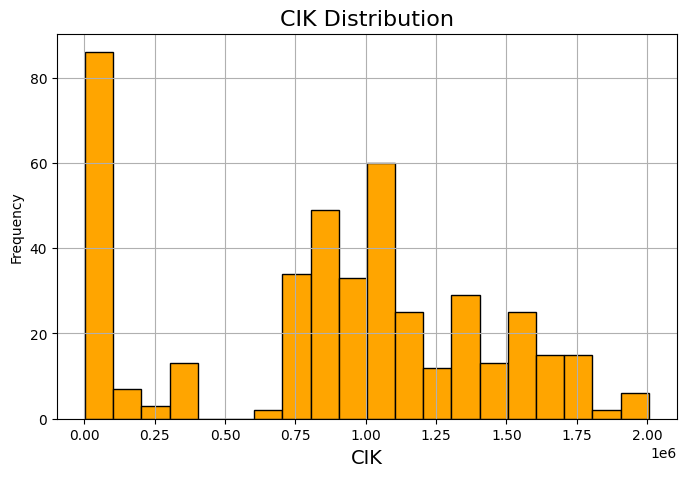

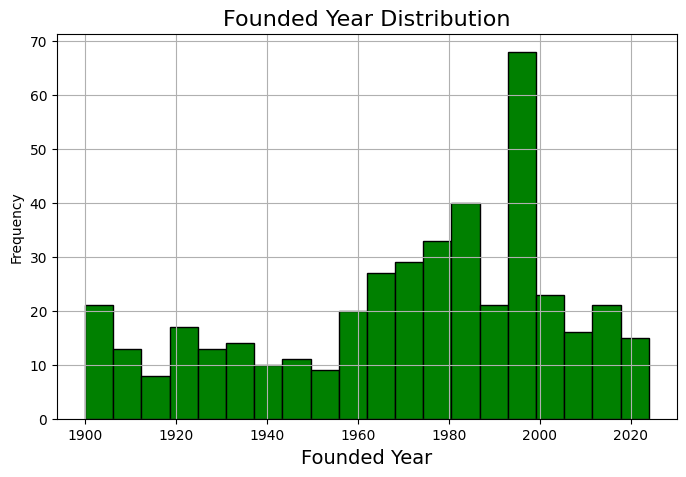

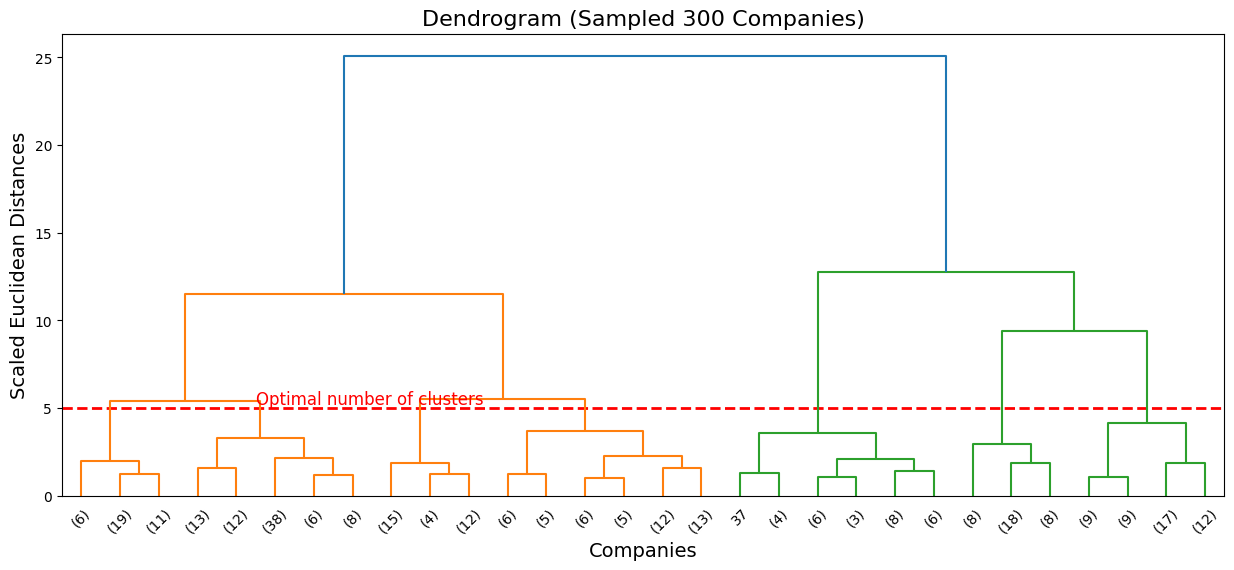

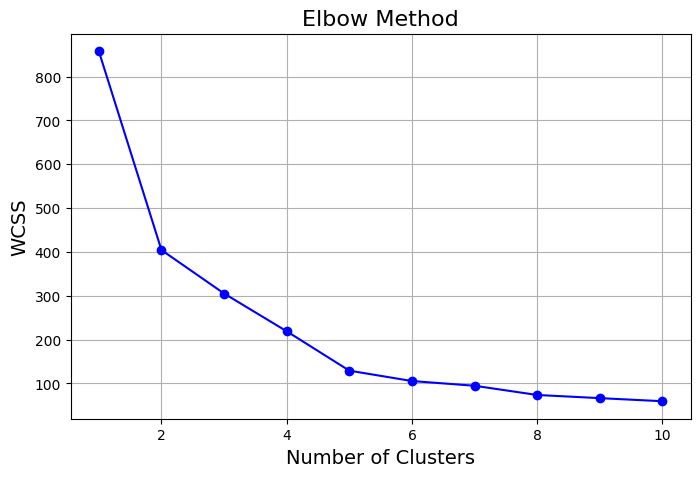

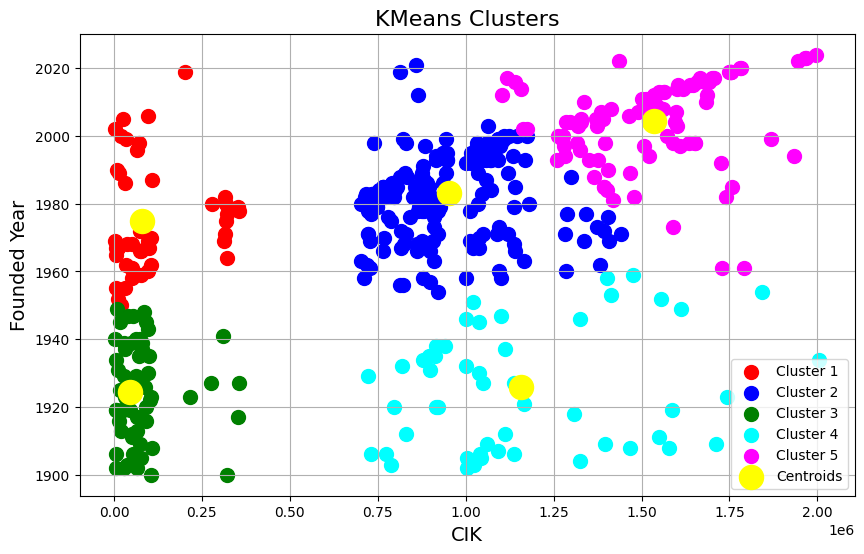

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re

%matplotlib inline

# 1. Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/constituents.csv"
df = pd.read_csv(url)

# 2. Clean 'Founded' column
def extract_year(val):
    if pd.isna(val):
        return np.nan
    match = re.search(r'\b(19|20)\d{2}\b', str(val))  # match years 1900-2099
    return int(match.group()) if match else np.nan

df['Founded_clean'] = df['Founded'].apply(extract_year)
df['CIK'] = pd.to_numeric(df['CIK'], errors='coerce')
df_clean = df.dropna(subset=['CIK', 'Founded_clean'])

# 3. Histograms
plt.figure(figsize=(8,5))
plt.hist(df_clean['CIK'], bins=20, color='orange', edgecolor='k')
plt.title("CIK Distribution", fontsize=16)
plt.xlabel("CIK", fontsize=14)
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.hist(df_clean['Founded_clean'], bins=20, color='green', edgecolor='k')
plt.title("Founded Year Distribution", fontsize=16)
plt.xlabel("Founded Year", fontsize=14)
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 4. Prepare data for clustering
X_full = df_clean[['CIK', 'Founded_clean']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# 5. Hierarchical clustering dendrogram (sampled)
df_sample = df_clean.sample(n=300, random_state=42)
X_sample_scaled = scaler.fit_transform(df_sample[['CIK', 'Founded_clean']].values)

plt.figure(figsize=(15,6))
linkage_matrix = sch.linkage(X_sample_scaled, method='ward')
plt.title('Dendrogram (Sampled 300 Companies)', fontsize=16)
plt.xlabel('Companies', fontsize=14)
plt.ylabel('Scaled Euclidean Distances', fontsize=14)

# Draw horizontal line to indicate clusters
optimal_distance = 5  # adjust visually based on dendrogram
plt.hlines(y=optimal_distance, xmin=0, xmax=300, lw=2, colors='red', linestyles='--')
plt.text(x=50, y=optimal_distance+0.2, s='Optimal number of clusters', color='red', fontsize=12)

dendrogram = sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.show()

# 6. Elbow Method for KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o', color='blue')
plt.title('Elbow Method', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.grid(True)
plt.show()

# From elbow plot, let's select optimal clusters (for example k=5)
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# 7. Visualize KMeans clusters
plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(k_optimal):
    plt.scatter(X_full[y_kmeans==i, 0], X_full[y_kmeans==i, 1], s=100, c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
centroids_unscaled = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids_unscaled[:,0], centroids_unscaled[:,1], s=300, c='yellow', label='Centroids')

plt.title('KMeans Clusters', fontsize=16)
plt.xlabel('CIK', fontsize=14)
plt.ylabel('Founded Year', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()
